In [ ]:
Assignment 1: CIFAR-10 Image Classification 
� Dataset: CIFAR-10 (60,000 images of 10 classes – airplanes, cars, birds, cats, etc.) 
� Task: 
 Build a CNN model to classify images into 10 categories. 
 Preprocess the dataset, normalize, and apply data augmentation. 
 Train the model using training and validation sets. 
� Expected Outcomes: 
 Achieve at least 75-80% accuracy. 
 Plot training/validation accuracy and loss over epochs. 
Tune hyperparameters (batch size, learning rate). And interpret the results.

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ayush1220/cifar10")

print("Path to dataset files:", path)

C:\Users\SASWATA\.conda\envs\gpusupport\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|███████████████████████████████████████████████████████████████████████████████| 139M/139M [00:15<00:00, 9.62MB/s]

Extracting files...


Path to dataset files: C:\Users\SASWATA\.cache\kagglehub\datasets\ayush1220\cifar10\versions\2


In [4]:
train_path=r"C:\Users\SASWATA\.cache\kagglehub\datasets\ayush1220\cifar10\versions\2\cifar10\train"
test_path=r"C:\Users\SASWATA\.cache\kagglehub\datasets\ayush1220\cifar10\versions\2\cifar10\test"

In [5]:
# Initialize Image Data Generator
data_generator = ImageDataGenerator(
    rescale=1/255.,
    validation_split=0.1
)

# Load Training Data
train_data = data_generator.flow_from_directory(
    train_path,
    target_size=(32,32),
    batch_size=64,
    shuffle=True,
    subset='training',
    seed=42
)

# Load Validation Data
valid_data = data_generator.flow_from_directory(
    train_path,
    target_size=(32,32),
    batch_size=64,
    shuffle=True,
    subset='validation',
    seed=42
)

# Load Testing Data
test_data = data_generator.flow_from_directory(
    test_path,
    target_size=(32,32),
    batch_size=64,
    shuffle=False,
    seed=42
)

Found 45000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [6]:
data_aug=tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip('horizontal'),
        tf.keras.layers.RandomFlip('vertical'),
        tf.keras.layers.RandomRotation(0.15)
    ]
)

In [15]:
from tensorflow.keras import regularizers

model=tf.keras.Sequential(
    [
        tf.keras.Input(shape=(32,32,3)),
        #data_aug,
        tf.keras.layers.Conv2D(16,3,activation='relu', padding='same'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(16,3,activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(16,3,activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.0005)),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32,3,activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32,3,activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
        #tf.keras.layers.Conv2D(32,3,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Conv2D(64,3,activation='relu', padding='same'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64,3,activation='relu',kernel_regularizer=regularizers.l2(0.0005)),
        tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.Conv2D(128,3,activation='relu'),
        tf.keras.layers.Conv2D(64,3,activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Dropout(0.2),
       # tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
        #tf.keras.layers.Conv2D(64,3,activation='relu',kernel_regularizer=regularizers.l2(0.0005)),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.0005)),
        tf.keras.layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.0005)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dense(10,activation='softmax')    ]
)

In [16]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_14 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                     

In [18]:
history=model.fit(train_data,epochs=45,batch_size=128,validation_data=valid_data,verbose=2)

Epoch 1/45
704/704 - 8s - loss: 2.5330 - accuracy: 0.1650 - val_loss: 2.1876 - val_accuracy: 0.3080 - 8s/epoch - 11ms/step
Epoch 2/45
704/704 - 7s - loss: 2.1007 - accuracy: 0.3125 - val_loss: 1.9859 - val_accuracy: 0.3640 - 7s/epoch - 10ms/step
Epoch 3/45
704/704 - 7s - loss: 1.9071 - accuracy: 0.3880 - val_loss: 1.7505 - val_accuracy: 0.4546 - 7s/epoch - 10ms/step
Epoch 4/45
704/704 - 7s - loss: 1.8030 - accuracy: 0.4288 - val_loss: 1.7110 - val_accuracy: 0.4774 - 7s/epoch - 10ms/step
Epoch 5/45
704/704 - 7s - loss: 1.7084 - accuracy: 0.4702 - val_loss: 1.5469 - val_accuracy: 0.5444 - 7s/epoch - 10ms/step
Epoch 6/45
704/704 - 7s - loss: 1.6181 - accuracy: 0.5089 - val_loss: 1.4511 - val_accuracy: 0.5790 - 7s/epoch - 10ms/step
Epoch 7/45
704/704 - 7s - loss: 1.5311 - accuracy: 0.5456 - val_loss: 1.5846 - val_accuracy: 0.5350 - 7s/epoch - 10ms/step
Epoch 8/45
704/704 - 7s - loss: 1.4550 - accuracy: 0.5802 - val_loss: 1.3576 - val_accuracy: 0.6144 - 7s/epoch - 10ms/step
Epoch 9/45
704/7

In [19]:
loss,acc=model.evaluate(test_data)

157/157 [==============================] - 25s 159ms/step - loss: 0.8139 - accuracy: 0.8019


In [20]:
print(f'Model accuracy : {acc*100 :.2f} %')

Model accuracy : 80.19 %


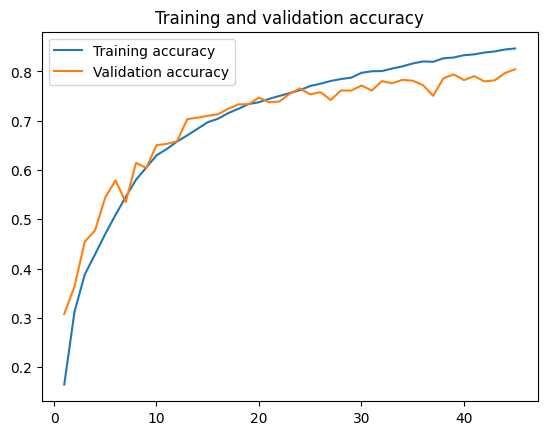

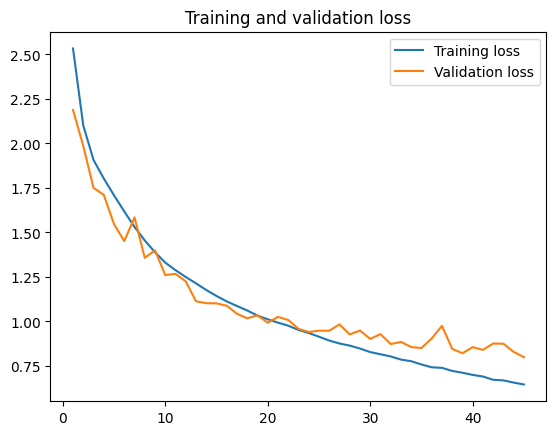

In [21]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label="Training accuracy")
plt.plot(epochs, val_accuracy, label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [22]:
# Import required libraries
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get true labels from the test data
y_true = test_data.classes

# Get model predictions (probabilities) and convert to class labels
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute and print the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute and print the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

157/157 [==============================] - 1s 8ms/step
Confusion Matrix:
[[854   9  50  11   4   0   3   8  32  29]
 [ 14 892   5   2   1   0   5   0  13  68]
 [ 55   1 717  41  74  20  47  31   9   5]
 [ 24   1  72 659  50  77  53  40  12  12]
 [ 16   3  41  47 784   9  36  52   9   3]
 [ 12   0  50 206  46 603  15  60   6   2]
 [ 10   0  53  67  21   2 838   3   2   4]
 [ 18   0  29  25  28  24   2 861   1  12]
 [ 57   8   7   7   2   0   1   3 900  15]
 [ 18  29   3  10   0   0   4   7  18 911]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1000
           1       0.95      0.89      0.92      1000
           2       0.70      0.72      0.71      1000
           3       0.61      0.66      0.64      1000
           4       0.78      0.78      0.78      1000
           5       0.82      0.60      0.70      1000
           6       0.83      0.84      0.84      1000
           7       0.81      0.86      0

80% accuracy with 10000 support misclassifcations about 2000 images 